In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca Gambar

In [ ]:
image = cv2.imread('RGB_UTS.png')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definisikan ambang batas untuk setiap warna

## Merah

In [78]:
lower_red = np.array([100, 0, 0])
upper_red = np.array([255, 100, 100])
mask_red = cv2.inRange(img_rgb, lower_red, upper_red)

## Hijau

In [82]:
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 255, 100])
mask_green = cv2.inRange(img_rgb, lower_green, upper_green)

## Biru

In [84]:
lower_blue = np.array([0, 0, 100])
upper_blue = np.array([100, 100, 255])
mask_blue = cv2.inRange(img_rgb, lower_blue, upper_blue)

# gabungkan kombinasi channel

In [86]:
none_mask = np.zeros_like(mask_red)                      # NONE
blue_mask = mask_blue                                    # BLUE
red_blue_mask = cv2.bitwise_or(mask_red, mask_blue)      # RED-BLUE
rgb_mask = cv2.bitwise_or(red_blue_mask, mask_green)     # RED-GREEN-BLUE

# menampilkan gambar dan histogram

In [88]:
def show_image_and_hist(mask, title):
    rgb_mask = cv2.merge([mask, mask, mask])  # Convert grayscale to RGB for histogram
    color = ('r', 'g', 'b')

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    # Tampilkan gambar
    axs[0].imshow(mask, cmap='gray')
    axs[0].set_title(f'{title} - Mask')
    axs[0].axis('off')

    # Tampilkan histogram
    for i, col in enumerate(color):
        hist = cv2.calcHist([rgb_mask], [i], None, [256], [0, 256])
        axs[1].plot(hist, color=col)
        axs[1].set_xlim([0, 256])
    axs[1].set_title(f'{title} - Histogram')
    axs[1].set_xlabel('Intensity Value')
    axs[1].set_ylabel('Pixel Count')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Tampilkan hasil

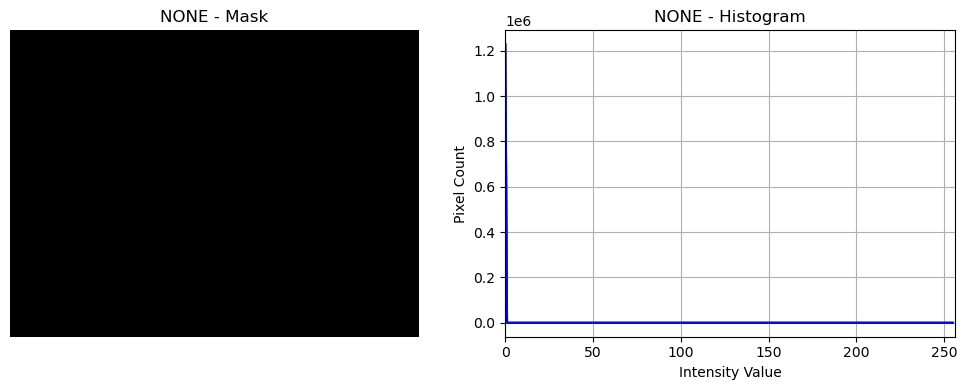

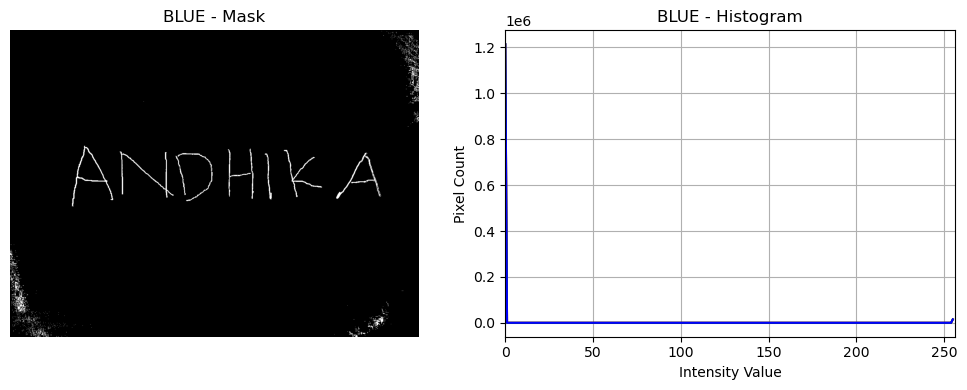

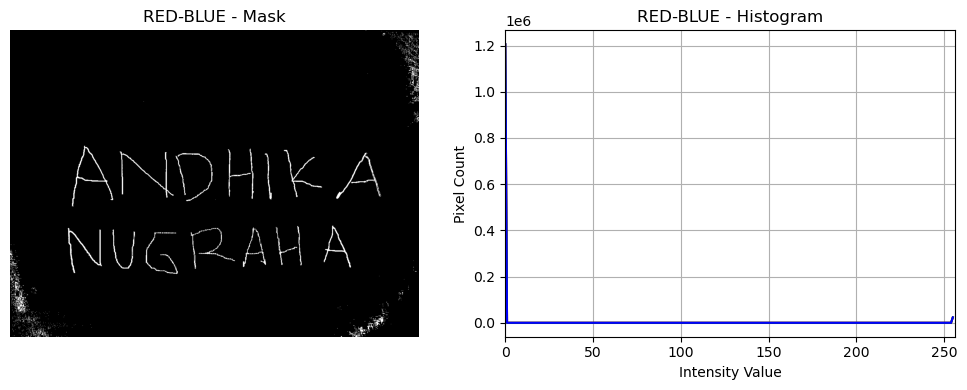

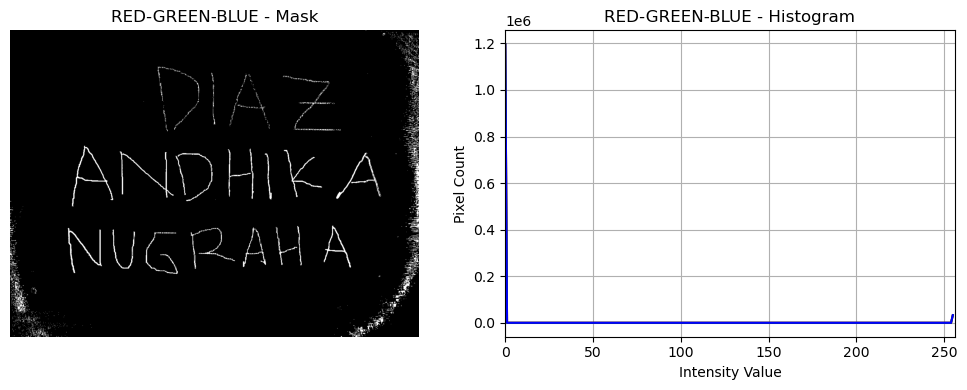

In [90]:
show_image_and_hist(none_mask, "NONE")
show_image_and_hist(blue_mask, "BLUE")
show_image_and_hist(red_blue_mask, "RED-BLUE")
show_image_and_hist(rgb_mask, "RED-GREEN-BLUE")
